In [2]:
#library import

import numpy as np
import math
from numpy import linalg as la
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

data,labels=load_boston(return_X_y=True)

In [3]:
n,m=np.shape(data)
labels=np.mat(labels).astype(np.float64).T
data=np.mat(data).astype(np.float64)

LS Solution:
Run  1 :
Regression Error= 35.66673849733066
Run  2 :
Regression Error= 51.10381296253176
Run  3 :
Regression Error= 58.50199892080734
Run  4 :
Regression Error= 90.00824465337877
Run  5 :
Regression Error= 58.083680171050446


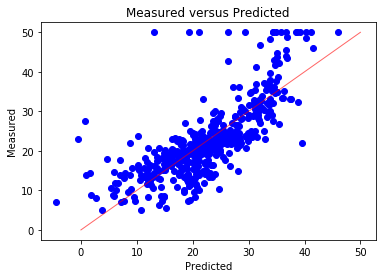

In [4]:
#Cross Validation

def K_fold_CV_LS(samples,labels,k:int):
    print("LS Solution:")
    n,m=np.shape(samples)
    samples_with_labels=np.mat([[0 for i in range(m+2)] for j in range(n)]).astype(np.float64)
    samples_with_labels[:,:m]=samples
    samples_with_labels[:,m]=1
    samples_with_labels[:,m+1]=labels
    a=n//k
    fold=[0 for i in range(k)]
    labels_derived=np.mat([0 for i in range(n)]).astype(np.float64).T
    for i in range(k-1):
        fold[i]=samples_with_labels[i*a:(i+1)*a,:].astype(np.float64)
    fold[k-1]=samples_with_labels[(k-1)*a:,:].astype(np.float64)
    
    for i in range(k):
        print("Run ",i+1,":")
        test_samples=fold[i].astype(np.float64)
        ni,mi=np.shape(fold[i])
        training_samples=np.mat([[0 for j in range(mi)] for i in range(n-ni)]).astype(np.float64)
        sample_number=0
        for j in range(k):
            if j==i:
                continue
            nj,mj=np.shape(fold[j])
            training_samples[sample_number:sample_number+nj,:]=fold[j]
            sample_number=sample_number+nj
            
        # LS solution
        omega=np.mat([0 for i in range(mi)]).astype(np.float64)
        omega=(training_samples[:,:m+1].T*training_samples[:,:m+1]).I*training_samples[:,:m+1].T*training_samples[:,m+1]
        labels_telda=test_samples[:,:m+1]*omega
        if(i==k-1):
            labels_derived [(k-1)*a:,:]=labels_telda
        else:
            labels_derived[i*a:(i+1)*a,:]=labels_telda
        print("Regression Error=",la.norm(labels_telda-test_samples[:,m+1],2))
    labels_derived=np.array(labels_derived).astype(np.float64)
    labels=np.array(labels).astype(np.float64)
    plt.scatter(labels_derived,labels,color='b')
    plt.xlabel("Predicted") 
    plt.ylabel("Measured")
    plt.title("Measured versus Predicted")
    plt.plot([0,max(labels)],[0,max(labels)], color='r', linewidth=1, alpha=0.6)
        
K_fold_CV_LS(data,labels,5)

In [16]:
#Cross Validation

def K_fold_CV_RR(samples,labels,k:int):
    print("RR Solution")
    n,m=np.shape(samples)
    samples_with_labels=np.mat([[0 for i in range(m+2)] for j in range(n)]).astype(np.float64)
    samples_with_labels[:,:m]=samples
    samples_with_labels[:,m]=1
    samples_with_labels[:,m+1]=labels
    a=n//k
    fold=[0 for i in range(k)]
    Omega=np.mat([[0 for i in range(k)] for j in range(m+1)]).astype(np.float64)
    Lambda=np.linspace(0,99,100)
    result=[0 for i in range(100)]
    for i in range(k-1):
        fold[i]=samples_with_labels[i*a:(i+1)*a,:].astype(np.float64)
    fold[k-1]=samples_with_labels[(k-1)*a:,:].astype(np.float64)
    
    for l in range(100):
        for i in range(k):
            test_samples=fold[i].astype(np.float64)
            ni,mi=np.shape(fold[i])
            training_samples=np.mat([[0 for j in range(mi)] for i in range(n-ni)]).astype(np.float64)
            sample_number=0
            for j in range(k):
                if j==i:
                    continue
                nj,mj=np.shape(fold[j])
                training_samples[sample_number:sample_number+nj,:]=fold[j]
                sample_number=sample_number+nj
            
            # RR solution
            omega=np.mat([0 for i in range(mi)]).astype(np.float64)
            omega=(training_samples[:,:m+1].T*training_samples[:,:m+1]+Lambda[l]*np.eye(m+1,dtype=np.float64)).I*training_samples[:,:m+1].T*training_samples[:,m+1]
            Omega[:,i]=omega
            labels_telda=test_samples[:,:m+1]*omega
            result[l]=la.norm(labels_telda-np.mat(fold[k-1]).astype(np.float64)[:,m+1],2)
    plt.plot(Lambda,result)
    plt.xlabel("Lambda")
    plt.ylabel("RR Error")
    return Lambda[result.index(min(result))]

RR Solution
Result(Test with the left fold): 35.07865809077031


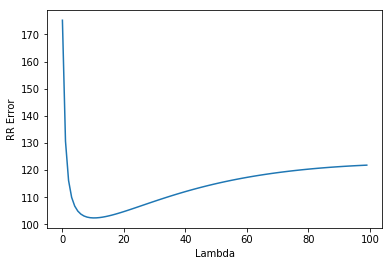

In [23]:
Lambda=K_fold_CV_RR(data[:400,:],labels[:400],5)
data_hat=np.mat([[0 for i in range(m+1)] for j in range(n-400)]).astype(np.float64)
data_hat[:,:m]=data[400:,:]
data_hat[:,m]=1
omega_overall=(data_hat.T*data_hat+Lambda*np.eye(m+1,dtype=np.float64)).I*data_hat.T*labels[400:]
labels_predicted=data_hat*omega_overall
print("Result(Test with the left fold):",la.norm(labels_predicted-labels[400:],2))